In [45]:
# đọc dữ liệu từ file
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# 1.1 đọc dũ liệu
df = pd.read_csv('../data/orginal_sales_data_edit.csv',
                 encoding='utf-8', header=0, delimiter=',')


In [46]:
# 1.2 loại bỏ dòng dữ liệu rỗng
df.dropna(how='all', inplace=True)


In [47]:
# 1.3 loại bỏ dữ liệu trùng, biết rằng đữ liệu trùng là dữ liệu có đồng thời ORDERNUMBER và ORDERDATE như nhau
# (*) kiểm tra lại nghiệp vụ này
# df.drop_duplicates(subnet=['ORDERNUMBER', 'ORDERDATE'], inplace=True)
df.drop_duplicates(inplace=True)


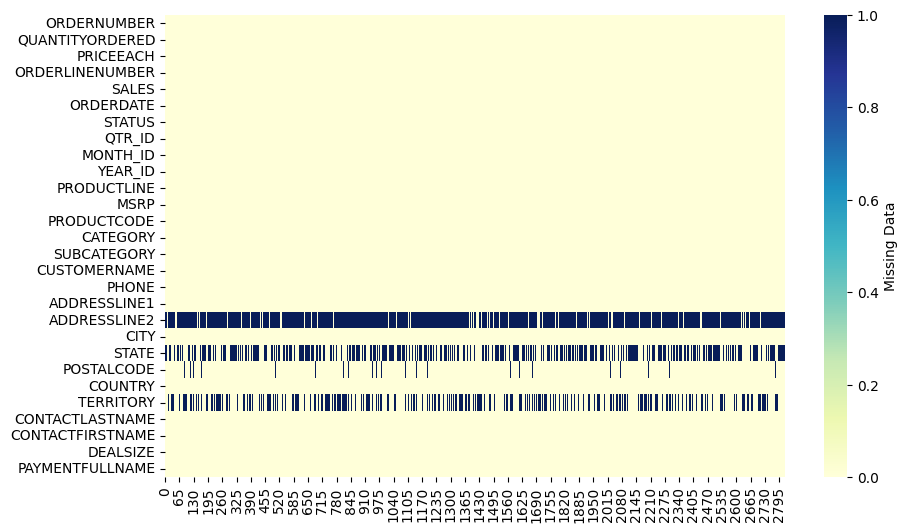

In [48]:
# 1.4 kiểm tra các dữ liệu thiếu bằng chart
# trực quan dữ liệu thiếu với seaborn heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(df.isna().transpose(),
            cmap='YlGnBu',
            cbar_kws={'label': 'Missing Data'})
plt.savefig('my_missing_value_1.png', dpi=100)


các một màu đậm đang bị thiếu dữ liệu

<Figure size 1000x600 with 0 Axes>

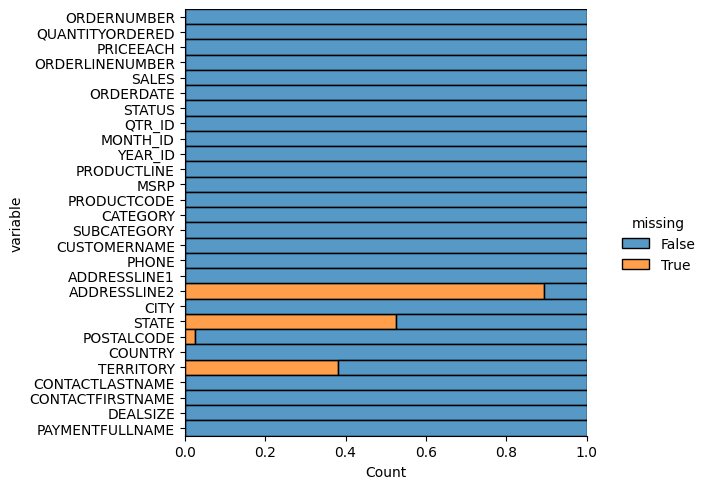

In [49]:
# (cách 2) 1.4 kiểm tra các dữ liệu thiếu bằng chart
# Trực quan dữ liệu thiếu bằng seaborn
plt.figure(figsize=(10, 6))
sns.displot(
    data=df.isna().melt(value_name='missing'),
    y='variable',
    hue='missing',
    multiple='fill',
    aspect=1.25
)
plt.savefig('my_missing_value_2.png', dpi=100)


In [50]:
# 1.4.1 Điền thiếu dữ liệu với dữ liệu đinh tính
# 1.4.1.1 với dữ liệu biểu diễn dạng chuỗi thì thay thế bằng unknow
# 1.4.1.2 với dữ liệu biểu diễn bằng số thì thay bằng 0

df['ADDRESSLINE2'].fillna('Unknow', inplace=True)
df['STATE'].fillna('Unknow', inplace=True)
df['TERRITORY'].fillna('Unknow', inplace=True)
df['POSTALCODE'].fillna(0, inplace=True)


In [51]:
# 1.5 tách cột PAYMENTFULLNAME thành PAYMENTLASTNAME và PAYMENTFIRSTNAME, sau đó xoá cột PAYMENTFULLNAME
df[['PAYMENTLASTNAME', 'PAYMENTFIRSTNAME']
   ] = df['PAYMENTFULLNAME'].str.split(' ', expand=True)
df = df.drop('PAYMENTFULLNAME', axis=1)

df[['PAYMENTLASTNAME', 'PAYMENTFIRSTNAME']]


,PAYMENTLASTNAME,PAYMENTFIRSTNAME
0,Yu,Kwai
1,Henriot,Paul
2,DaCunha,Daniel
3,Young,Julie
4,Brown,Julie
...,...,...
2818,Freyre,Diego
2819,Koskitalo,Pirkko
2820,Freyre,Diego
2821,Roulet,Annette


In [52]:
# 1.6 lưu dữ liệu đã xử lý thành 1 file với tên processed_sales_data với header là tên cột và phần cách bằng dấu ','
df.to_csv('../data/processed_sales_data.csv',
          sep=',', encoding='utf-8', index=False)


số lượng đơn hàng theo năm

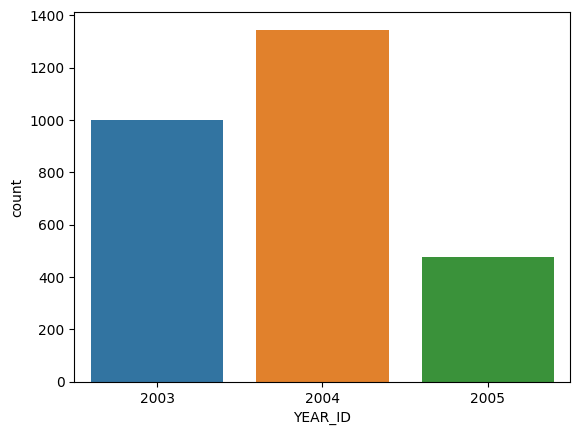

"\ncó thể dùng biểu đồ barplot với nhiều tuỳ chỉnh trong hàm tổng hợp: count, mean, sum, min, max, std\nfrom numpy import count_nonzero\nsns.barplot(x='YEAR_ID',\n            y= 'ORDERNUMBER',\n            data=df,\n            ci=None,\n            estimator=count_nonzero) # default estimator=mean\n\n# show the plot\nplt.show()\n"

In [53]:
# 1.1.1 Hãy cho biết số lượng đơn hàng theo năm (YEAR_ID)
sns.countplot(x='YEAR_ID', data=df)
plt.show()

'''
có thể dùng biểu đồ barplot với nhiều tuỳ chỉnh trong hàm tổng hợp: count, mean, sum, min, max, std
from numpy import count_nonzero
sns.barplot(x='YEAR_ID',
            y= 'ORDERNUMBER',
            data=df,
            ci=None,
            estimator=count_nonzero) # default estimator=mean

# show the plot
plt.show()
'''


điếm có bao nhiêu đơn hàng trong 1 năm

C:\Users\USER\AppData\Local\Temp\ipykernel_5788\2363925740.py:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='YEAR_ID',


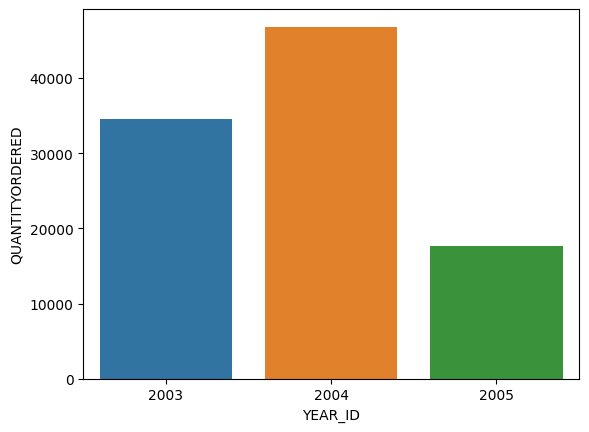

In [54]:
# 1.1.1 Hãy cho biết số lượng đơn hàng theo năm (YEAR_ID)
from numpy import count_nonzero
sns.barplot(x='YEAR_ID',
            y='QUANTITYORDERED',
            data=df,
            ci=None,
            estimator=sum)  # default estimator=mean

# show the plot
plt.show()


C:\Users\USER\AppData\Local\Temp\ipykernel_5788\736341265.py:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='YEAR_ID',


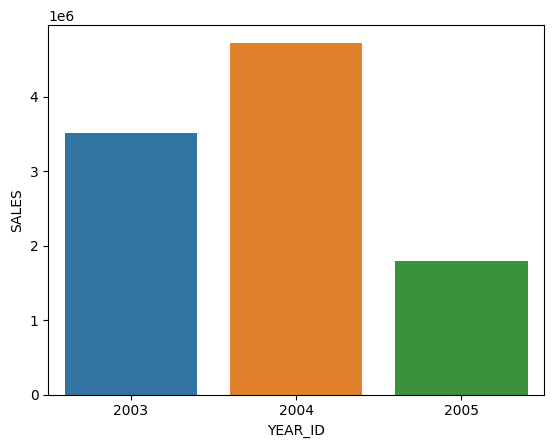

In [55]:
# 1.1.1 Hãy cho biết số lượng đơn hàng theo năm (YEAR_ID)
from numpy import count_nonzero
sns.barplot(x='YEAR_ID',
            y='SALES',
            data=df,
            ci=None,
            estimator=sum)  # default estimator=mean

# show the plot
plt.show()


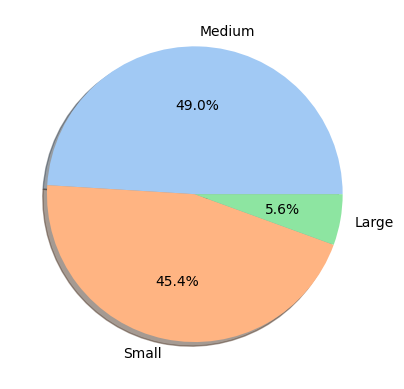

"\nhoặc sử dụng nâng cao với nhiều tuỳ thuộc trong hàm tổng hợp\ngb=df.groupby(['DEALSIZE'])['ORDERNUMBER'].agg(['count'])\ndata = list(gb['count'])\nlabels=gb.index\n\ncolors = sns.color_palette('pastel')\nplt.pie(values, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True)\nplt.show()\n\n"

In [56]:
# Hãy cho biết tỉ lệ đơn hàng theo DEALSIZE
labels = df['DEALSIZE'].value_counts().index
values = df['DEALSIZE'].value_counts().values
colors = sns.color_palette('pastel')
plt.pie(values, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True)
plt.show()

'''
hoặc sử dụng nâng cao với nhiều tuỳ thuộc trong hàm tổng hợp
gb=df.groupby(['DEALSIZE'])['ORDERNUMBER'].agg(['count'])
data = list(gb['count'])
labels=gb.index

colors = sns.color_palette('pastel')
plt.pie(values, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True)
plt.show()

'''


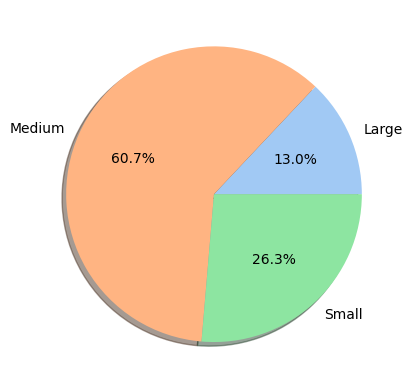

In [57]:
# 1.1.3 Hãy cho biết tỉ lệ giá trị SALES cho DEALSIZE
gb = df.groupby(['DEALSIZE'])['SALES'].agg(['sum'])
data = list(gb['sum'])
labels = gb.index

colors = sns.color_palette('pastel')
plt.pie(data, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True)
plt.show()


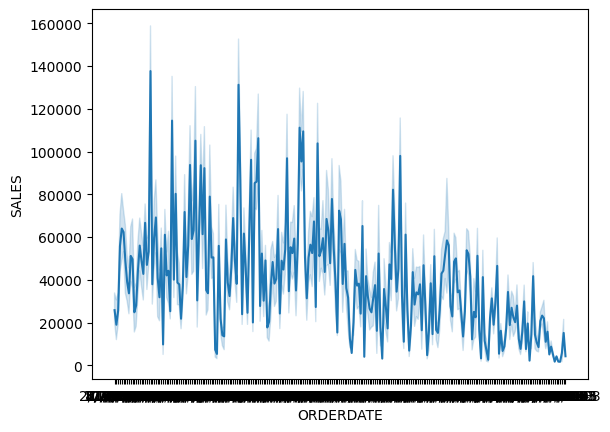

In [58]:
# 1.1.7 Hãy cho biết tổng giá trị SALES theo ngày
sns.lineplot(x='ORDERDATE', y='SALES', data=df, estimator=sum)
plt.show()


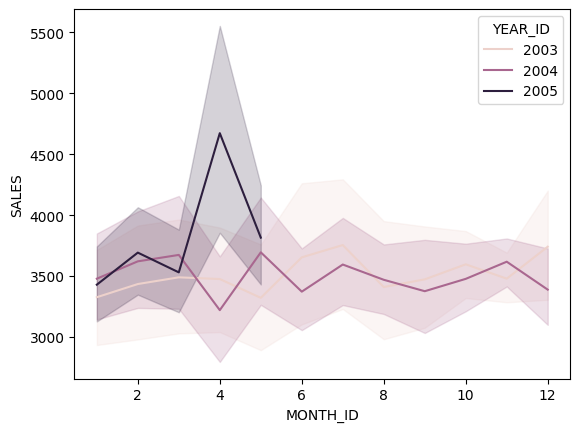

In [59]:
# 1.1.8 Hãy cho biết gía trị SALES trung bình theo tháng năm
sns.lineplot(x='MONTH_ID', y='SALES', hue='YEAR_ID', data=df)
# default estimator=mean
plt.show()


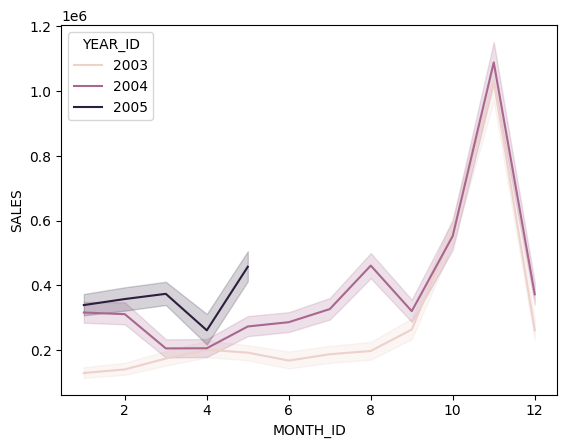

In [60]:
# 1.1.8-bis Hãy cho biết tổng giá trị SALES theo tháng năm
sns.lineplot(x='MONTH_ID', y='SALES', hue='YEAR_ID', data=df, estimator=sum)
# default estimator=mean
plt.show()


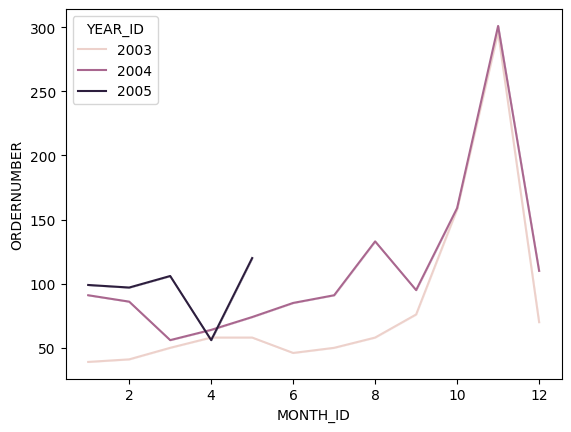

In [61]:
# 1.1.9 Hãy cho biết số lượng hoá đơn theo tháng, năm
# (*) gợi ý: biểu đồ line
sns.lineplot(x='MONTH_ID', y='ORDERNUMBER', hue='YEAR_ID',
             data=df, estimator=count_nonzero)
plt.show()


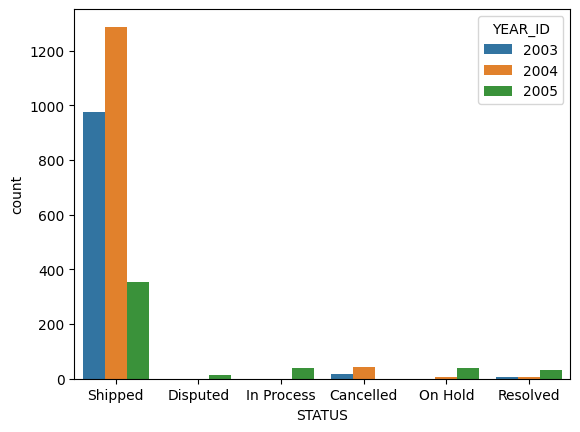

"\n# Có thể dùng biểu đò barplot nâng cao với nhiều tuỳ chỉnh hàm tổng hợp\nsns.barplot(x='STATUS',\n            y='ORDERNUMBER',\n            hue='YEAR_ID',\n            data=df,\n            ci=None,\n            estimator=count_nonzero)\n# default estimator=mean\n\n# show the plot\nplt.show()\n"

In [62]:
# 1.2.1 Hãy cho biết trạng thái số lượng đơn hàng (STATUS) theo nhóm các năm (YEAR_ID)

sns.countplot(x='STATUS', data=df, hue='YEAR_ID')
plt.show()

'''
# Có thể dùng biểu đò barplot nâng cao với nhiều tuỳ chỉnh hàm tổng hợp
sns.barplot(x='STATUS',
            y='ORDERNUMBER',
            hue='YEAR_ID',
            data=df,
            ci=None,
            estimator=count_nonzero)
# default estimator=mean

# show the plot
plt.show()
'''


C:\Users\USER\AppData\Local\Temp\ipykernel_5788\457366757.py:4: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='STATUS',


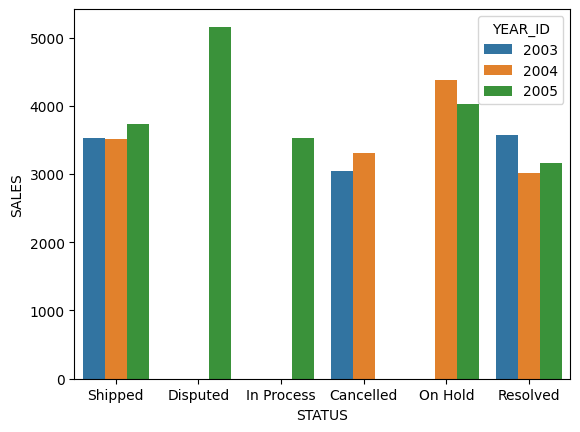

In [63]:
# 1.2.1-bis Hãy cho biết trung bình giá trị đơn hàng
# theo trạng thái (STATUS) theo nhóm các năm (YEAR_ID)

sns.barplot(x='STATUS',
            y='SALES',
            hue='YEAR_ID',
            data=df,
            ci=None)
# default estimator=mean

plt.show()


C:\Users\USER\AppData\Local\Temp\ipykernel_5788\1996092980.py:4: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='STATUS',


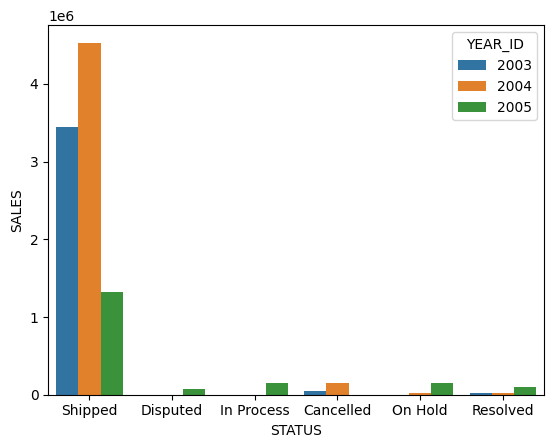

In [64]:
# 1.2.1-bis Hãy cho biết trung bình giá trị đơn hàng
# theo trạng thái (STATUS) theo nhóm các năm (YEAR_ID)

sns.barplot(x='STATUS',
            y='SALES',
            hue='YEAR_ID',
            data=df,
            ci=None,
            estimator=sum)
# default estimator=mean

plt.show()


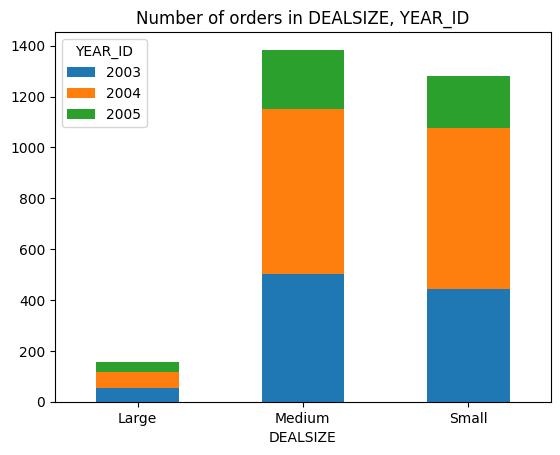

In [65]:
# 1.2.3. Hãy cho biết số lượng hơá đơn giữa các nhóm DEALSIZE theo năm YEAR_ID
gb = df.groupby(['DEALSIZE', 'YEAR_ID'])['ORDERNUMBER'].count().unstack()
gb.plot(kind='bar', stacked=True)

plt.title('Number of orders in DEALSIZE, YEAR_ID')
plt.xticks(rotation=0, ha='center')
plt.show()


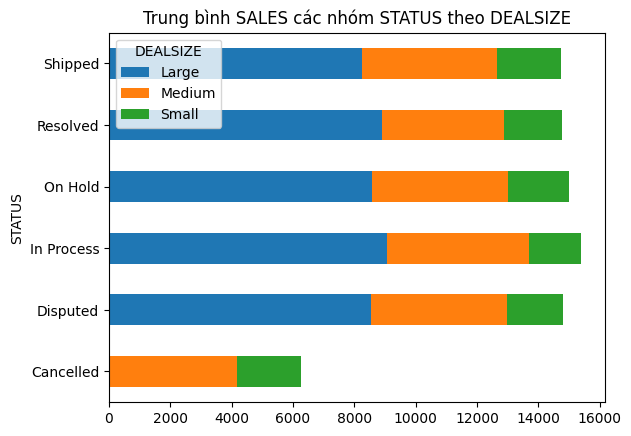

In [66]:
# 1.2.4 Hãy cho biết trung bình SALES các nhóm STATUS theo DEALSIZE
gb = df.groupby(['STATUS', 'DEALSIZE'])['SALES'].mean().unstack()
gb.plot(kind='barh', stacked=True)

plt.title('Trung bình SALES các nhóm STATUS theo DEALSIZE')
plt.xticks(rotation=0, ha='center')
plt.show()


## Phần 3 mô tả dữ liệu

In [67]:
# 2.1.1.1 Mô tả dữ liệu của QUANTITYORDERRD
df['QUANTITYORDERED'].describe()


count    2823.000000
mean       35.092809
std         9.741443
min         6.000000
25%        27.000000
50%        35.000000
75%        43.000000
max        97.000000
Name: QUANTITYORDERED, dtype: float64

In [68]:
# 2.1.1 Mô tả dữ liệu của QUANTITYORDERRD, PRICEEACH, SALES
df[['QUANTITYORDERED', 'PRICEEACH', 'SALES']].describe()


,QUANTITYORDERED,PRICEEACH,SALES
count,2823.000000,2823.000000,2823.000000
mean,35.092809,83.658544,3553.889072
std,9.741443,20.174277,1841.865106
min,6.000000,26.880000,482.130000
25%,27.000000,68.860000,2203.430000
50%,35.000000,95.700000,3184.800000
75%,43.000000,100.000000,4508.000000
max,97.000000,100.000000,14082.800000


In [69]:
# 2.1.1.1 Mô tả dữ liệu SALES theo nhóm DEALSIZE
df.groupby('DEALSIZE')['QUANTITYORDERED'].describe()

# hoặc dùng df.groupby('DEALSIZE')['QUANTITYORDERED'].describe().unstack()


,count,mean,std,min,25%,50%,75%,max
DEALSIZE,,,,,,,,
Large,157.0,47.222930,10.082098,29.0,42.0,46.0,50.0,97.0
Medium,1384.0,37.947254,8.443130,20.0,32.0,39.0,45.0,66.0
Small,1282.0,30.525741,8.485265,6.0,24.0,29.0,36.0,64.0


## Phần 4: Khai thác sự phân phi dữ liệu, chỉ dùng trên biến định lượng

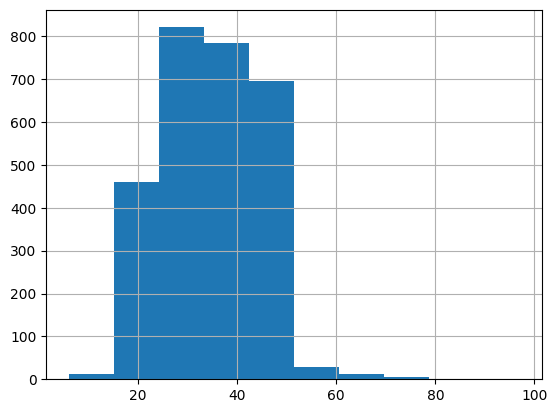

"\nHoặc nâng cao hơn với nhiều tuỳ chọn\nsns.displot(df, x='QUANTITYORDERED', kind='kde')\nplt.show()\n"

In [70]:
# 2.1.2.1 Vẽ biểu đồ histogram của QUANTITYORDERRD
df['QUANTITYORDERED'].hist()
plt.show()

'''
Hoặc nâng cao hơn với nhiều tuỳ chọn
sns.displot(df, x='QUANTITYORDERED', kind='kde')
plt.show()
'''


cho biết xác suất xảy ra trên các đoạn

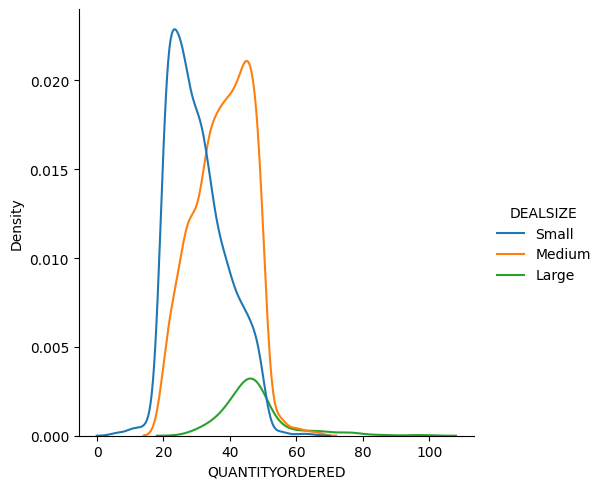

In [71]:
# 2.1.2.2 vẽ biểu đồ histogram của QUANTITYORDERRD theo DEALSIZE
# Phân phối (Histogram) của QUANTITYORDERRD theo nhóm DEALSIZE
sns.displot(df, x='QUANTITYORDERED', hue='DEALSIZE', kind='kde')
# sns.displot(df, x='QUANTITYORDERED', hue='DEALSIZE', kind=True)

plt.show()


màu xanh lá cây ổn định nhất

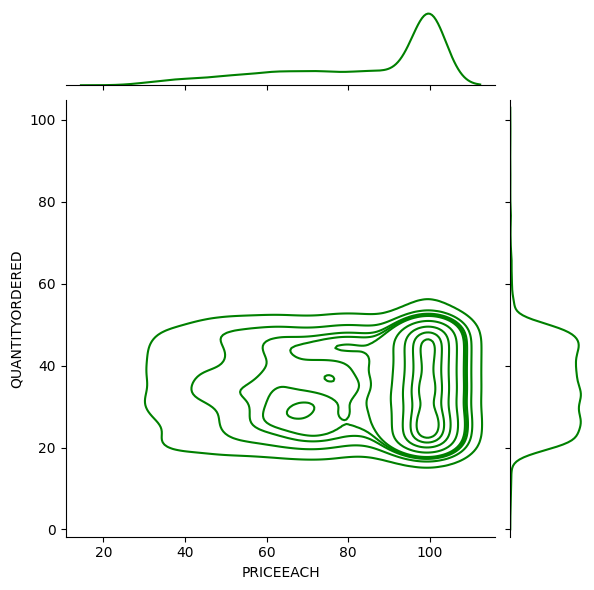

In [72]:
# 2.1.2.3 vẽ biểu đồ JoinPlot của QUANTITYORDERRD và PRICEEACH
sns.jointplot(data=df, x='PRICEEACH',
              y='QUANTITYORDERED', kind='kde', color='g')
plt.show()


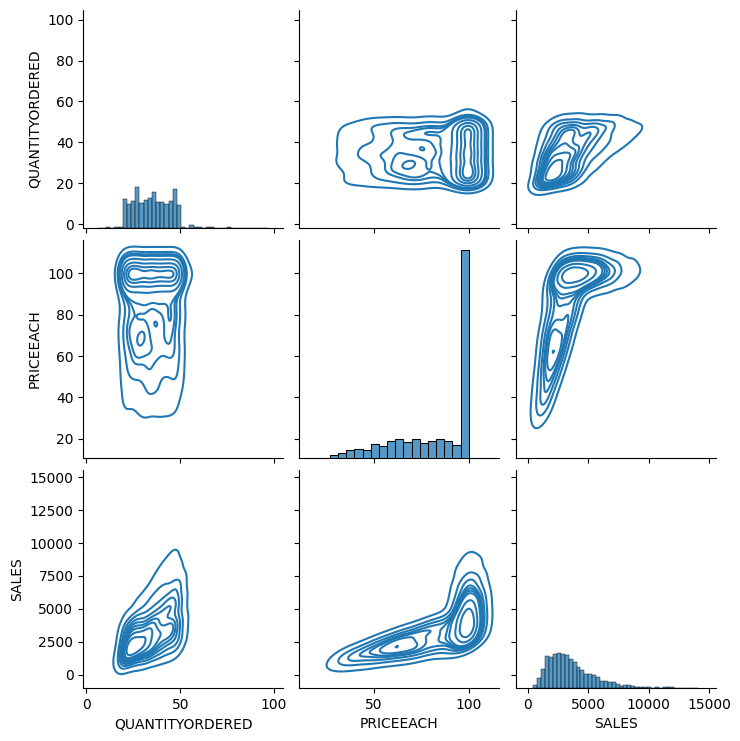

In [73]:
# 2.1.2.4 vẽ biểu đồ PairPlot của QUANTITYORDERRD, PRICEEACH, SALES
sns.pairplot(df[['QUANTITYORDERED', 'PRICEEACH', 'SALES']],
             diag_kind='hist', kind='kde')
plt.show()


Biểu diễn tương quan biến số theo từng cặp

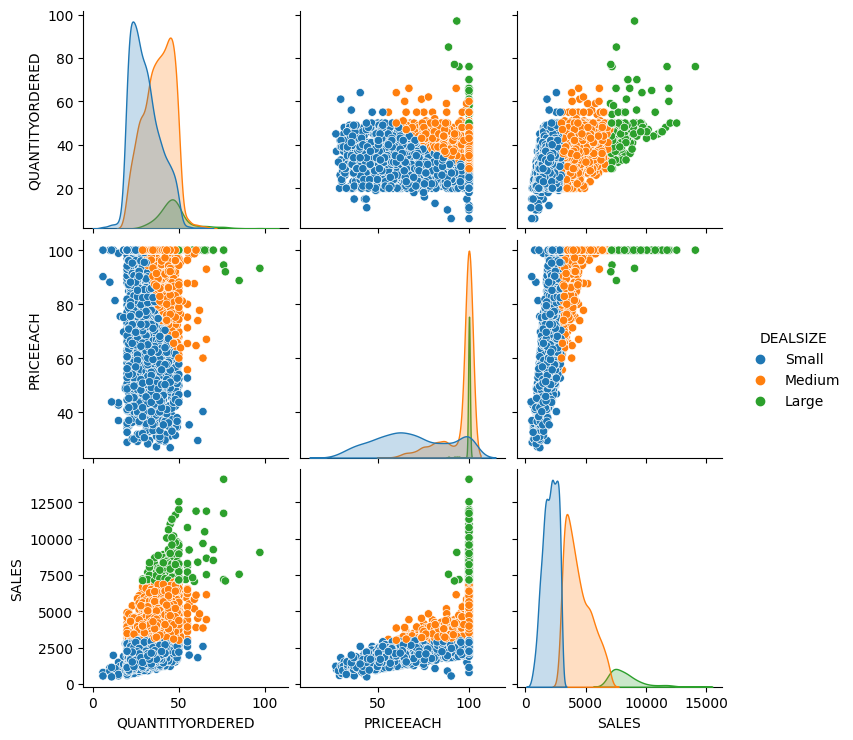

In [74]:
# 2.1.2.5 Phân phối (pairPlot, histogram) của QUANTITYORDERED, PRICEEACH, SALES theonhoms DEALSIZE
sns.pairplot(df[['QUANTITYORDERED', 'PRICEEACH',
             'SALES', 'DEALSIZE']], hue='DEALSIZE')
plt.show()


đường chéo biểu thị phân phối cho từng biến số, màu cho dealsize

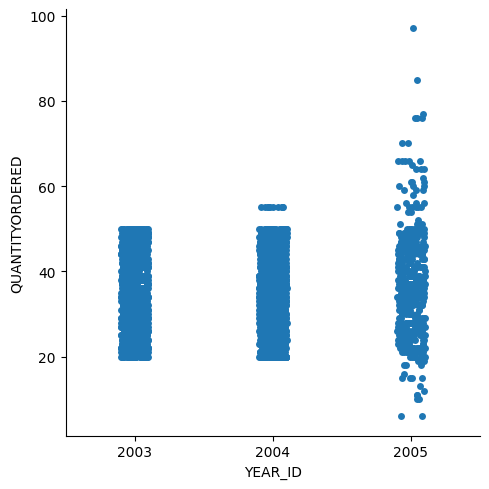

In [75]:
# 2.1.3.0 Hãy vẽ trực quan số lượng sản phẩm phân phối theo năm QUANTITYORDERED (catplot)
sns.catplot(x='YEAR_ID', y='QUANTITYORDERED', data=df)
plt.show()


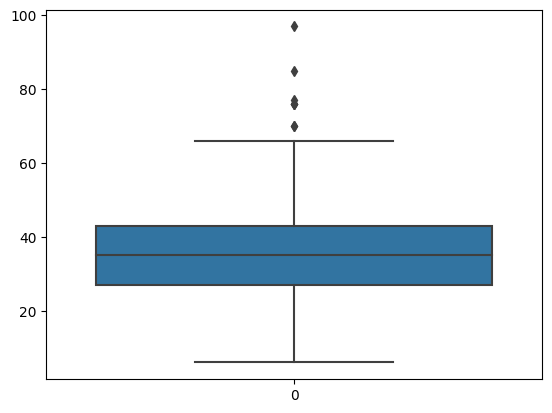

In [76]:
# 2.1.3.1 Hãy vẽ trực quan số lượng sản phẩm phân phối theo năm của QUANTITYORDERED
sns.boxplot(data=df['QUANTITYORDERED'])
plt.show()


3 canh biểu diễn cho từng quý  
... biểu thị cho ngoại biên

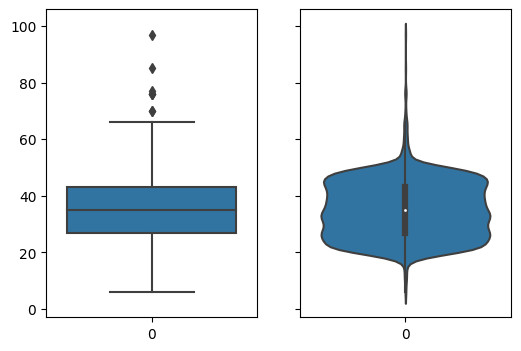

In [77]:
# 2.1.3.2 Biểu diễn (Boxplot, violin) của QUANTITYORDERED trên cùng chart
_, axes = plt.subplots(nrows=1, ncols=2, sharey=True, figsize=(6, 4))
sns.boxplot(data=df['QUANTITYORDERED'], ax=axes[0])
sns.violinplot(data=df['QUANTITYORDERED'], ax=axes[1])
plt.show()


Khai thác thông tin tương quan giữa các biến số định lượng

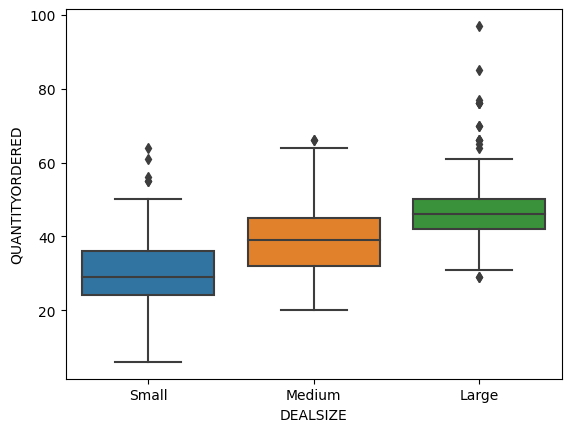

In [78]:
# 2.1.3.3 Biểu điễn (Boxplot) của QUANTITYORDERED theo nhóm DEALSIZE
sns.boxplot(x='DEALSIZE', y='QUANTITYORDERED', data=df)
plt.show()


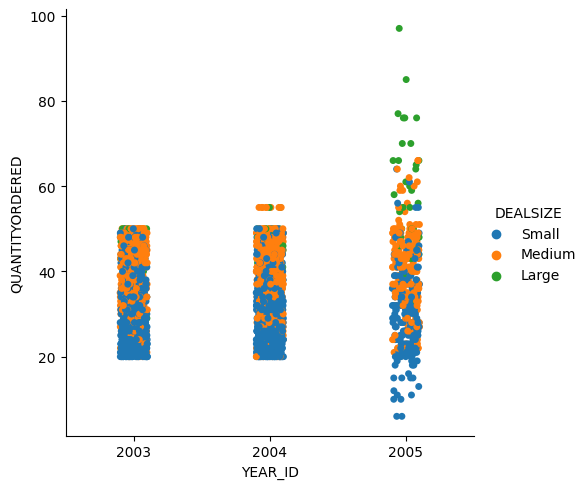

In [79]:
# 2.1.3.3.bis Biểu diễn (catplot) của QUANTITYORDERED theo nhóm DEALSIZE
sns.catplot(x='YEAR_ID', y='QUANTITYORDERED', hue='DEALSIZE', data=df)
plt.show()


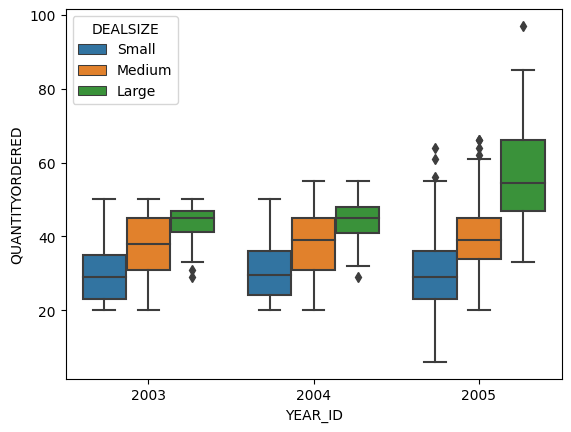

In [80]:
# 2.1.3.4 Biểu diễn (Boxplot) của QUANTITYORDERED theo năm, nhóm DEALSIZE
sns.boxplot(x='YEAR_ID', y='QUANTITYORDERED', hue='DEALSIZE', data=df)
plt.show()


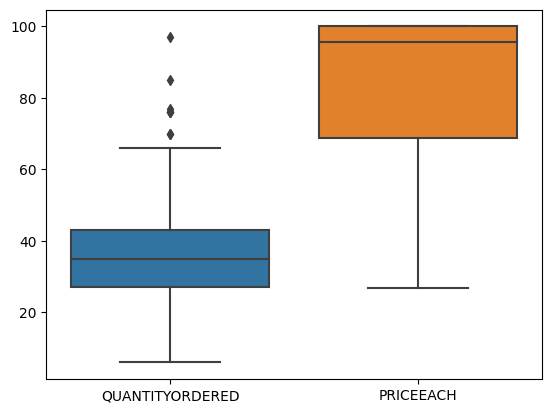

In [81]:
# 2.1.3.5 Biểu diễn (Boxplot) của QUANTITYORDERED, PRICEEACH
sns.boxplot(data=df[['QUANTITYORDERED', 'PRICEEACH']])
plt.show()


In [82]:
# 2.1.4.1 Độ xiên cẩu phân phối (Skew) của QUANTITYORDERED, PRICEEACH
df[['QUANTITYORDERED', 'PRICEEACH']].skew()


QUANTITYORDERED    0.362585
PRICEEACH         -0.946649
dtype: float64

Phân bổ mực độ nghiêng của dữ liệu, dữ liệu càng lớn càng xa doi phân phối chuẩn

In [83]:
# 2.1.5 Độ nhọn của phân phối (Kutorsis) của QUANTITYORDERED, PRICEEACH
df[['QUANTITYORDERED', 'PRICEEACH']].kurtosis()


QUANTITYORDERED    0.415744
PRICEEACH         -0.374818
dtype: float64

độ nhọn càng nhỏ thì xác xuất càng nhỏ

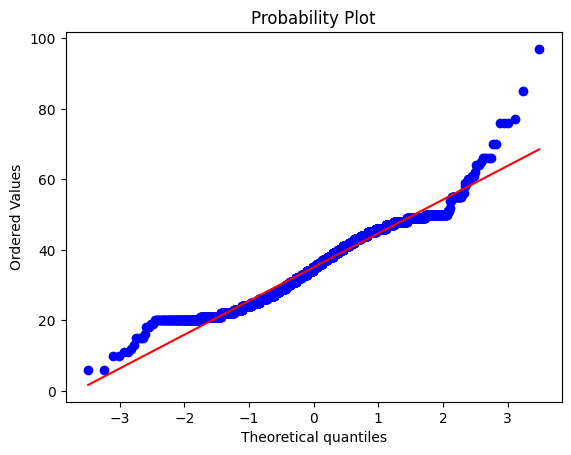

"\n# hoặc\nimport statsmodels.api as su\nsm.qqplot(df['QUANTITYORDERED'])\nplt.show()\n"

In [84]:
# 2.1.6 (cách 2) kiểm tra tính chuẩn (normal distribution) của QUANTITYORDERED, PRICEEACH, SALES

from scipy import stats
stats.probplot(df['QUANTITYORDERED'], plot=sns.mpl.pyplot)
plt.show()

'''
# hoặc
import statsmodels.api as su
sm.qqplot(df['QUANTITYORDERED'])
plt.show()
'''


không theo phân phối chuẩn do điểm màu xanh càng rời xa đường màu đỏ  
Nếu dữ liệu không phân phối chuẩn thì cần phải biến đổi dữ liệu theo các phương pháp như dùng hàm can

sau khi can


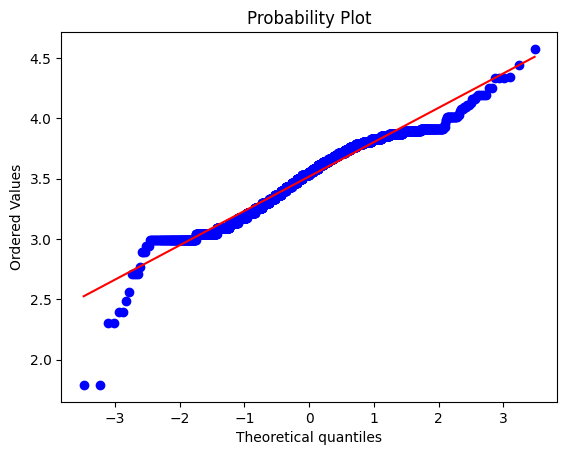

'\nSinh viên tự viết tools kiểm tra các hàm transform nào làm cho dữ liệu biến đổi hiểu chỉnh về gần phân phối chuẩn lg, sqrt, 1/x, 1/sqrt\n'

In [86]:
# 2.1.7 transform dữ liệu và kiểm tra normality của biến TRANSFORMEDQUANTITYORDERED
from scipy import stats
import numpy as np

df[['TRANSFORMEDQUANTITYORDERED']] = df[[
    'QUANTITYORDERED']].transform(func=lambda x: np.log(x))
stats.probplot(df['TRANSFORMEDQUANTITYORDERED'], plot=sns.mpl.pyplot)
plt.show()

'''
Sinh viên tự viết tools kiểm tra các hàm transform nào làm cho dữ liệu biến đổi hiểu chỉnh về gần phân phối chuẩn lg, sqrt, 1/x, 1/sqrt
'''


kỹ thuật 2

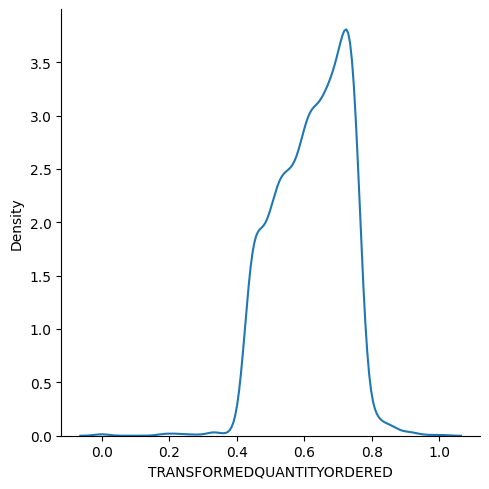

In [88]:
# 2.1.8 Hãy thực hiện normalize dữ liệu TRANSFORMEDQUANTITYORDERED
from sklearn import preprocessing
min_max_scaler = preprocessing.MinMaxScaler()
df[['TRANSFORMEDQUANTITYORDERED']] = min_max_scaler.fit_transform(
    df[['TRANSFORMEDQUANTITYORDERED']])
sns.displot(df, x='TRANSFORMEDQUANTITYORDERED', kind='kde')
plt.show()


để kéo vể 0 và 2 1

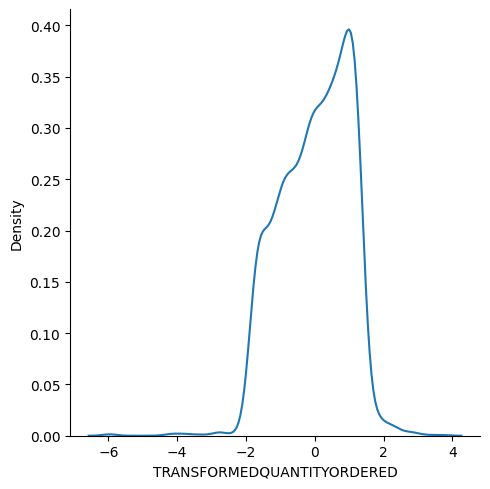

In [90]:
# 2.1.9 Hãy thực hiện standardization dữ liệu TRANSFORMEDQUANTITYORDERED

from sklearn.preprocessing import StandardScaler

# define standard scaler
scaler = StandardScaler()
# transform data
df[['TRANSFORMEDQUANTITYORDERED']] = scaler.fit_transform(
    df[['TRANSFORMEDQUANTITYORDERED']])

'''
# Hoặc
from scipy import stats
df['TRANSFORMEDQUANTITYORDERED'] = stats.zscore(df['TRANSFORMEDQUANTITYORDERED'])
stats.zscore(df['TRANSFORMEDQUANTITYORDERED'])
'''

sns.displot(df, x='TRANSFORMEDQUANTITYORDERED', kind='kde')
plt.show()


đưa trục giữa (trục nghiêng về 0)  
so sánh

In [91]:
# 2.2.1 Ma trận tương qua tuyến tính (Pearson) của các cặp QUANTITYORDERED, PRICEEACH, SALES

df[['QUANTITYORDERED', 'PRICEEACH', 'SALES']].corr()

# Hoặc
# df[['QUANTITYORDERED', 'PRICEEACH', 'SALES']].cov()


,QUANTITYORDERED,PRICEEACH,SALES
QUANTITYORDERED,1.000000,0.005564,0.551426
PRICEEACH,0.005564,1.000000,0.657841
SALES,0.551426,0.657841,1.000000


dùng heatmap

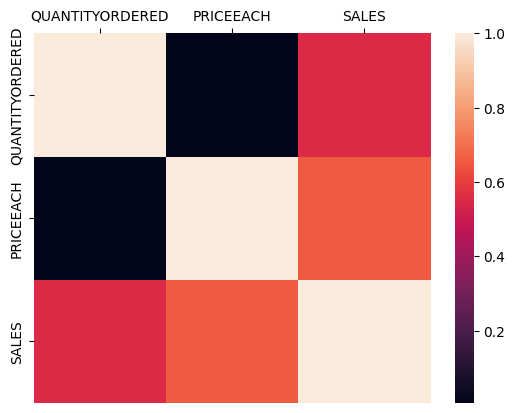

In [92]:
# 2.2.2 Vẽ biểu đồ Heatmap tương quan của các cặp QUANTITYORDERED, PRICEEACH, SALES
sns.heatmap(df[['QUANTITYORDERED', 'PRICEEACH', 'SALES']].corr(),
            vmax=1.0, square=False).xaxis.tick_top()


In [93]:
# 2.2.3 Tương quan của biến QUANTITYORDERED, PRICEEACH, SALES theo nhóm DEALSIZE
df.groupby('DEALSIZE')[['QUANTITYORDERED', 'PRICEEACH', 'SALES']].corr()


QUANTITYORDERED  PRICEEACH     SALES
DEALSIZE                                                      
Large    QUANTITYORDERED         1.000000  -0.569684  0.317111
         PRICEEACH              -0.569684   1.000000  0.073529
         SALES                   0.317111   0.073529  1.000000
Medium   QUANTITYORDERED         1.000000  -0.443546  0.344825
         PRICEEACH              -0.443546   1.000000  0.444365
         SALES                   0.344825   0.444365  1.000000
Small    QUANTITYORDERED         1.000000  -0.504154  0.312224
         PRICEEACH              -0.504154   1.000000  0.632605
         SALES                   0.312224   0.632605  1.000000

nhóm small đơn giá càng cao, khối lượng cao luôn

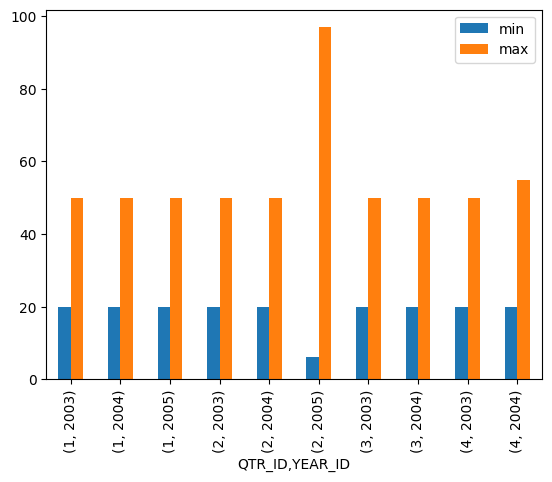

In [97]:
# 2.2.4 Vẽ biểu đồ cho biết giá trị min, max của số lượng sản phẩm trong mỗi đơn hàng theo quý, năm
# (*) Gợi ý: Biểu đồ so sánh nhóm un-stacked (vertical)
gb = df.groupby(['QTR_ID', 'YEAR_ID'])['QUANTITYORDERED'].agg(['min', 'max'])
gb.plot(kind='bar', stacked=False)
plt.show()


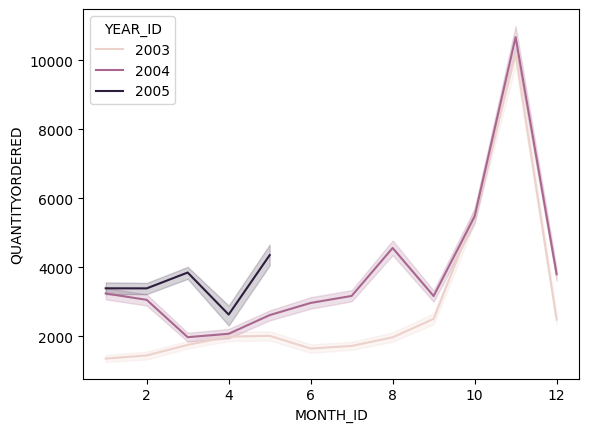

In [99]:
# 2.2.5 Vẽ biểu đồ cho biết số lượng sản phẩm theo tháng
# (*) Gợi ý: Biểu đồ line có 2 đường (Ox = tháng, Oy = tổng số lượng)
sns.lineplot(x='MONTH_ID', y='QUANTITYORDERED',
             hue='YEAR_ID', data=df, estimator=sum)
# default estimator=mean
plt.show()


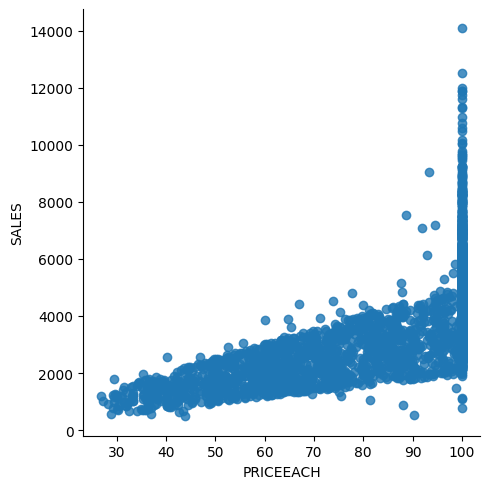

In [103]:
# 2.2.6 Vẽ biểu đồ cho biết quan hệ giữa SALES (Oy) và đơn giá (Ox) 
# (*) gợi ý: Biểu đồ scatter
sns.lmplot(data=df, x='PRICEEACH', y='SALES', fit_reg=False)
plt.show()

khảo sát tương quan giữa giá bán và đơn giá theo hồi quy tuyến tính nhưng không tìm ra hồi quy tuyến tính

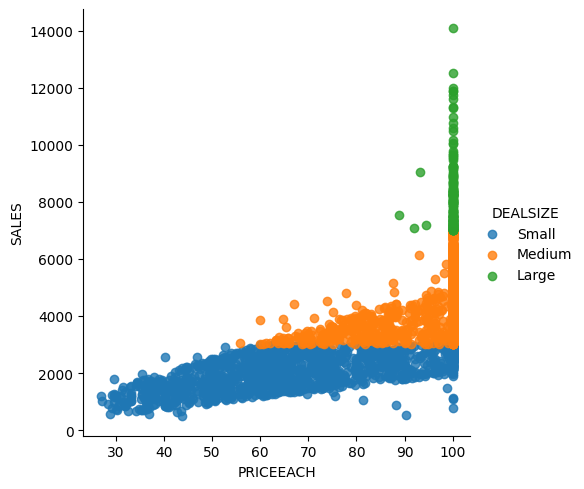

In [104]:
# 2.2.7 Vẽ biểu đồ cho biết quan hệ giữa SALES (Oy) và đơn giá (Ox) theo nhóm DEALSIZE

sns.lmplot(data=df, x='PRICEEACH', y='SALES', hue='DEALSIZE', fit_reg=False)
plt.show()

màu xanh trong nhóm large khoa xác định

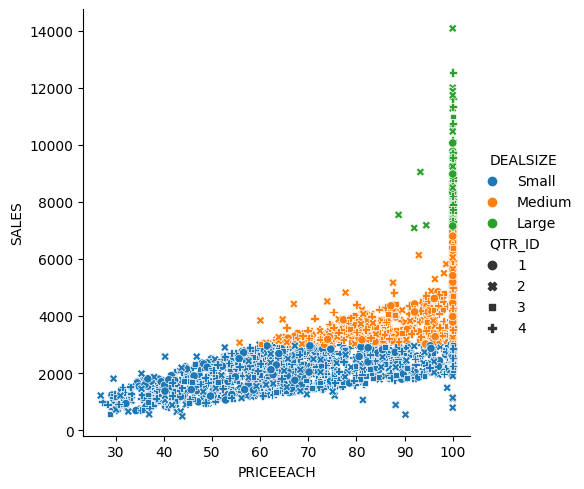

In [107]:
# 2.2.8 Vẽ biểu đồ cho biết quan hệ giữa SALES (Oy) và đơn giá (Ox) theo quý, theo DEALSIZE
sns.relplot(data=df, x='PRICEEACH', y='SALES', hue='DEALSIZE', style='QTR_ID')
plt.show()

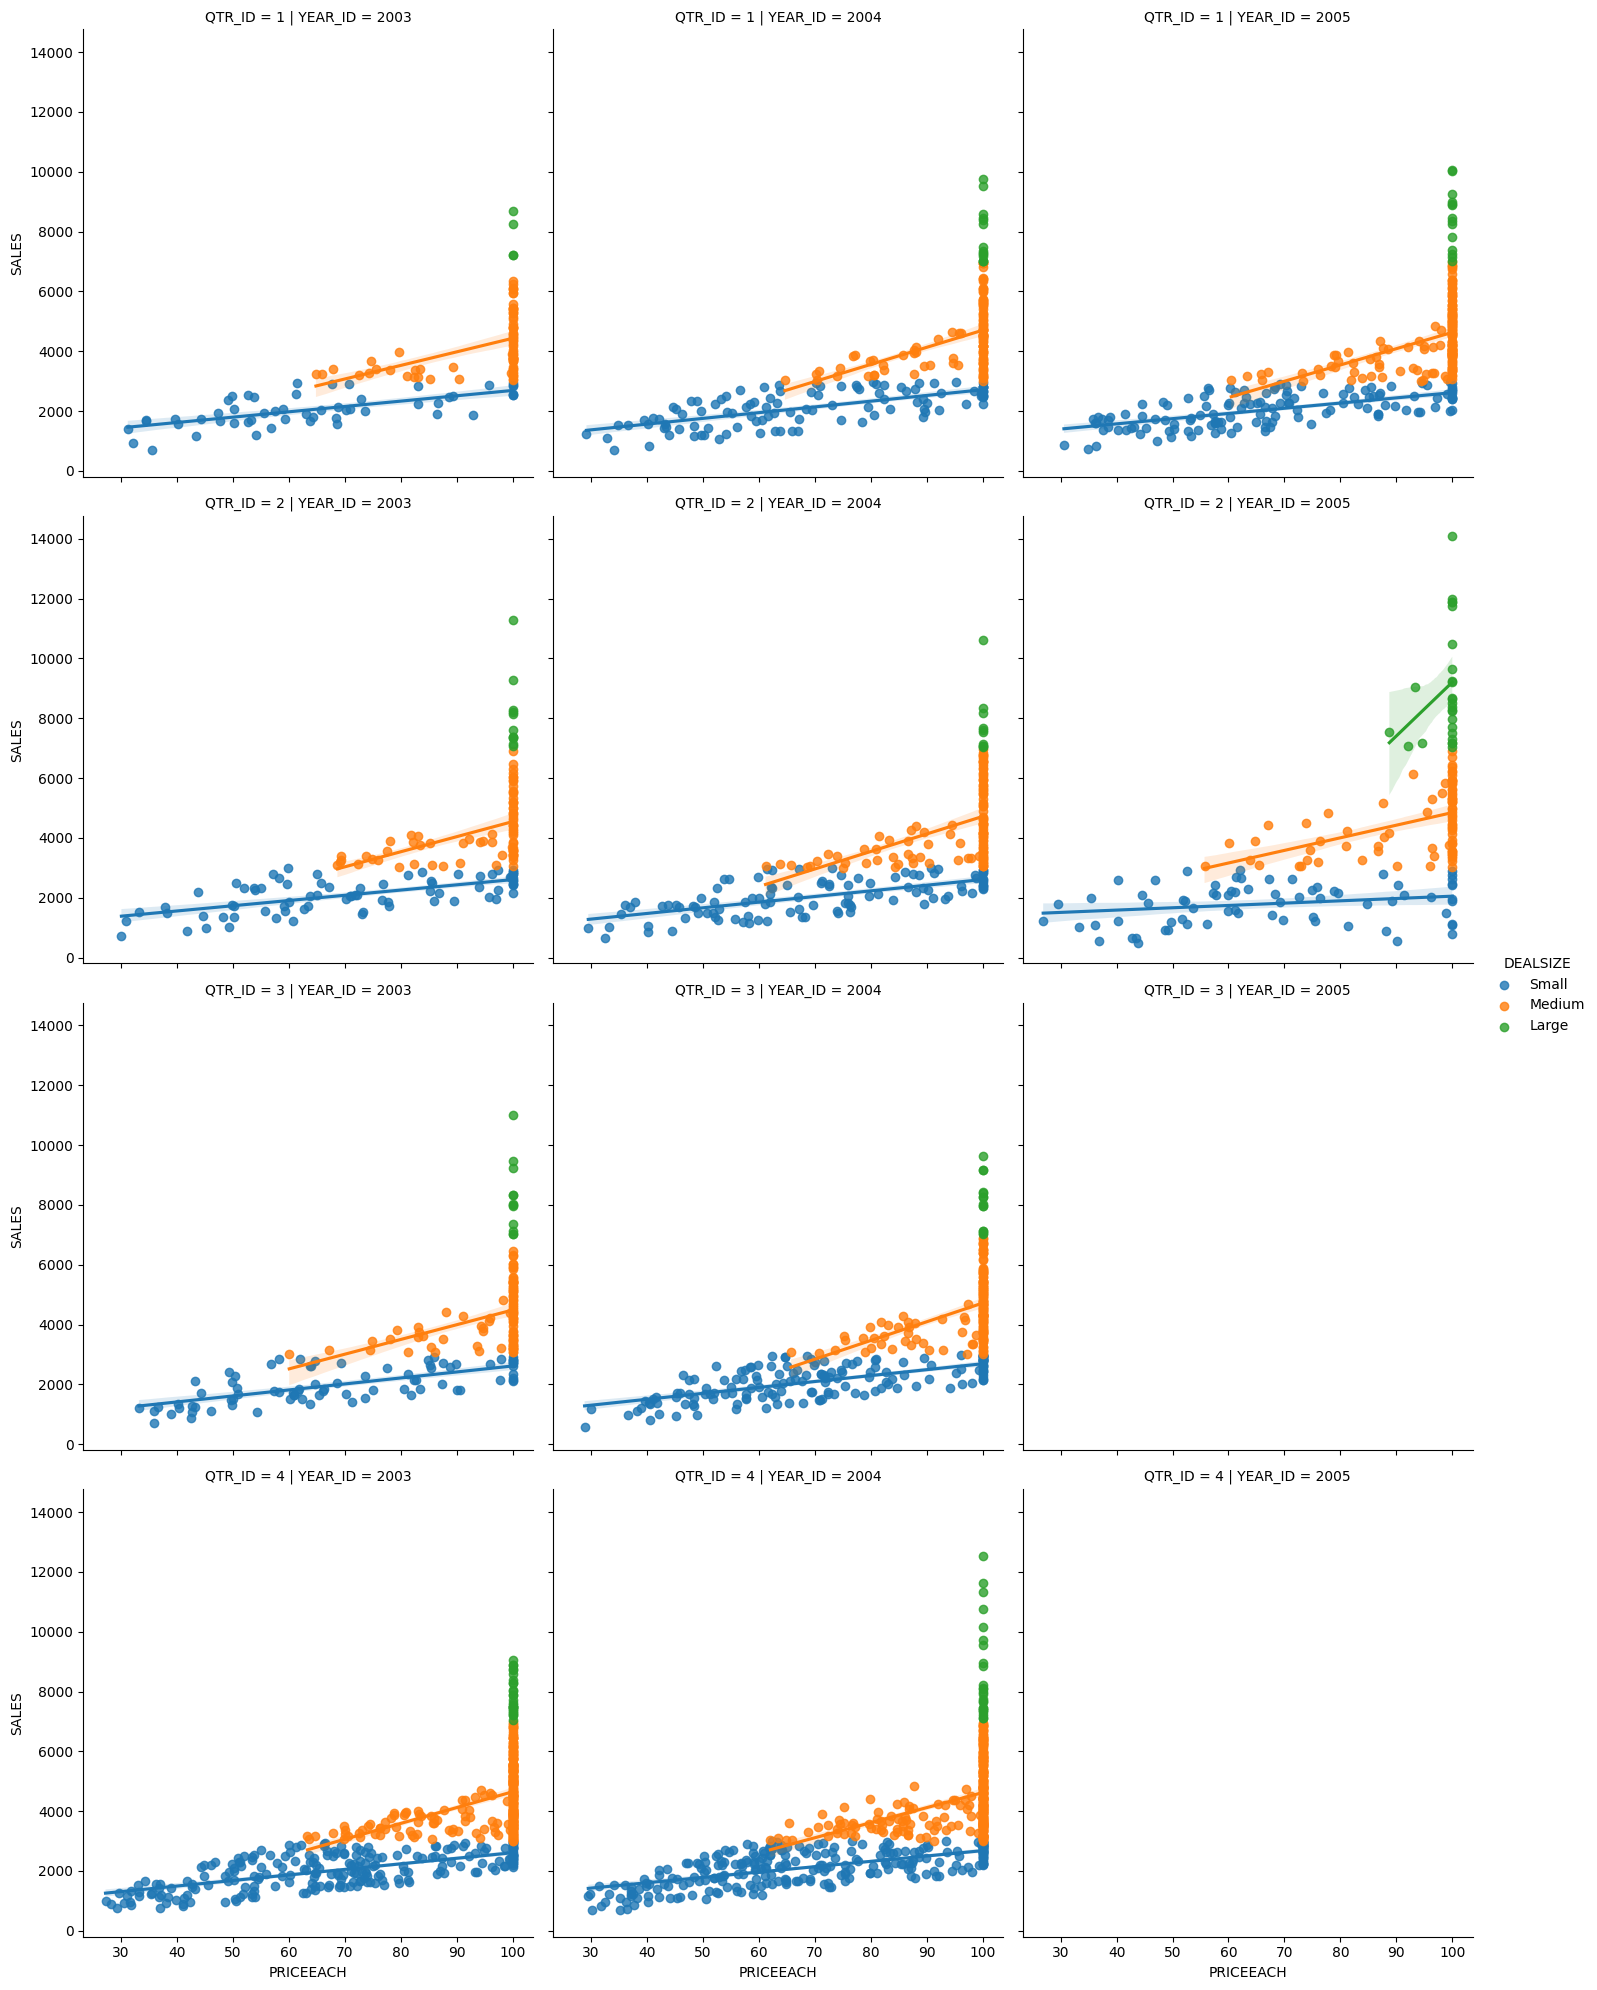

In [112]:
# 2.2.9 Vẽ biểu đồ cho biết quan hệ giữa SALES (Oy) và đơn giá (Ox) theo DEALSIZE
sns.lmplot(data=df, x='PRICEEACH', y='SALES', hue='DEALSIZE', col='YEAR_ID', row='QTR_ID', fit_reg=True)
plt.show()

Phân tích trên nhóm Small phân tích được hồi quy, còn các màu khác khó phân tích

Khi vẽ biểu đồ cần đặt các câu hỏi:
- Biến loại nào (định lượng hay định tính) của từng biến số
- có bao nhiêu biến tham gia
- bao nhiêu biển đồ thông tin
- ý nghĩa tri thức